### Задание 1 (Linear Regression)
Импортируйте библиотеки pandas и numpy.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.  
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.  Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.  
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.



In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

(506, 13)

In [11]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
Y = pd.DataFrame(target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, Y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [27]:
r2_score(Y_test, y_pred)

0.7112260057484932

### Задание 2 (Random Forest Regressor)
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.  
Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.  
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.  
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания. Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)

In [35]:
y_train = Y_train.values[:, 0]

In [36]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=42)

In [38]:
y_predict = model.predict(X_test)

In [39]:
r2_score(Y_test, y_predict)

0.8713629100115731

В данном случае, модель RandomForestRegressor работает лучше, чем LinearRegression, так как значение коэффициента детеминации ближе к 1

### *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.  
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [66]:
?RandomForestRegressor

In [70]:
feature_importances = model.feature_importances_
feature_importances = pd.Series(feature_importances, index=feature_names)
feature_importances.sort_values(ascending=False, inplace=True)

feature_importances.head(2)

RM       0.439920
LSTAT    0.380769
dtype: float64

Наибольшую важность показывают признаки RM и LSTAT

<AxesSubplot:>

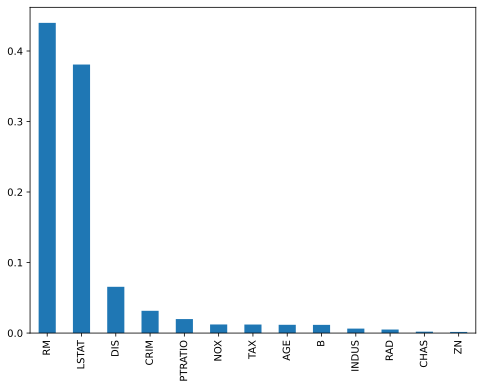

In [69]:
from matplotlib import pyplot as plt
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

rcParams['figure.figsize'] = 8, 6
feature_importances.plot(kind='bar')